<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Linear_Regression_Fish_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Used :- Fish market by Kaggle
# Basic understanding of dataset 
*   Length1:                  Vertical length in cm
*   Length2:                  Diagonal length in cm
*   Length3:                  Cross length in cm
*   Height:                   Height in cm
*   Width:                    Diagonal width in cm
*   Species:                  Species name of fish
*   Weight:                   Weight of fish in gram

i am using Lenght1 and Lenght2 as input feature and output in single varient Linear regression


In [1]:
# Linear regression on Fish data set 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [5]:
dataset = pd.read_csv("Fish.csv")
print(dataset)
dataset.shape

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


(159, 7)

In [6]:
dataf = pd.DataFrame(dataset)
dataf.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
x_value = dataf.iloc[0:159,2:3]
y_value = dataf.iloc[0:159,3:4]

In [8]:
x_value

,Length1
0,23.2
1,24.0
2,23.9
3,26.3
4,26.5
...,...
154,11.5
155,11.7
156,12.1
157,13.2


In [9]:
y_value

,Length2
0,25.4
1,26.3
2,26.5
3,29.0
4,29.0
...,...
154,12.2
155,12.4
156,13.0
157,14.3


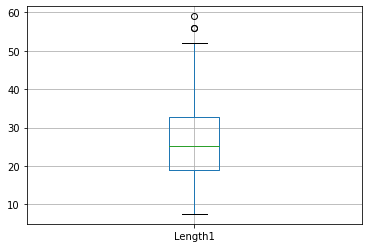

In [10]:
x_box=x_value.boxplot(column=['Length1'])

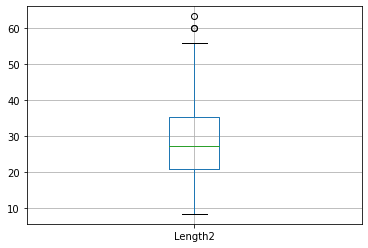

In [11]:
y_box=y_value.boxplot(column=['Length2'])

Text(0.5, 1.0, '1st LR Scatter plot ')

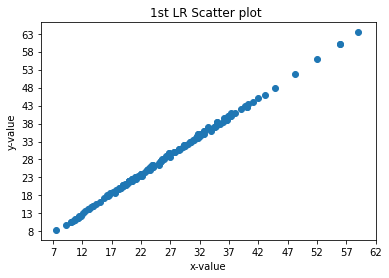

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(7,65,step=5))
plt.yticks(np.arange(8,65,step=5))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("1st LR Scatter plot ")

In [13]:
#define hypothesis  H(x) = theta_array[0]+theta_array[1]*x
def hypothesis(theta_array,x):  #theta_array =[theta_array[0],theta_araay[1]]
  return theta_array[0] + theta_array[1]*x


In [14]:
def cost_function(theta_array, x_value, y_value, m):
    # This function returns our cost function value at particular theta values
    total_error = 0
    for i in range(m):
        total_error += (theta_array[0] + theta_array[1]*x_value[i] - y_value[i])**2
    return total_error/(2*m)

In [15]:
def gradient_descent(theta_array,x,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x[i]) - y[i])*x[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)

    updated_theta_array = [new_theta0,new_theta1]
    print(updated_theta_array)
    return updated_theta_array

In [16]:
def training(x,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_array = [theta_0,theta_1]

    m=x.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x,y,m))   #taking all the cost function values and storing
        if(i%6==0):
            y_new=x*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x,y_new,'r')
            plt.scatter(x,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()
    return theta_array

In [17]:
training_data=pd.read_csv("Fish.csv")
cleaning_data = training_data.dropna()   # drops the observation for not a number
cleaning_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [18]:
x_train=cleaning_data['Length1']
y_train=cleaning_data['Length2']
x_value = x_train.values.reshape(x_train.size)
x_value.shape

(159,)

In [19]:
y_value = y_train.values.reshape(y_train.size)
y_value.shape

(159,)

[0.028415723270440254, 0.8522323270440249]


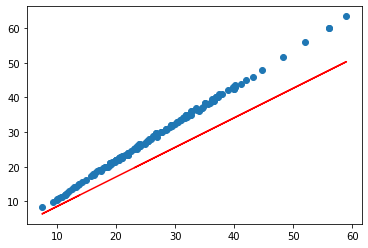

[0.034434344210988496, 1.0319771345075035]
[0.03572915404639911, 1.0698865467944059]
[0.03602765429023262, 1.0778812340007213]
[0.036116018121129745, 1.0795665598264432]
[0.036160058555060846, 1.0799211684749155]
[0.036194747475145, 1.079995113587262]


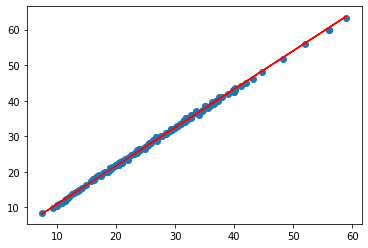

[0.03622746085638859, 1.0800098636203868]
[0.03625975437762679, 1.0800121288331477]
[0.03629195614991976, 1.080011760959335]
[0.036324135376086863, 1.0800108378435278]
[0.03635630665220515, 1.0800097977271652]
[0.03638847305715811, 1.0800087330404218]


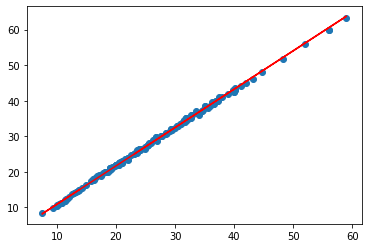

[0.03642063524071987, 1.0800076632778768]
[0.03645279334033724, 1.080006592551149]
[0.03648494738540124, 1.0800055217274132]
[0.03651709738251261, 1.0800044509895528]
[0.03654924333346531, 1.080003380376127]
[0.03658138523903945, 1.080002309895255]


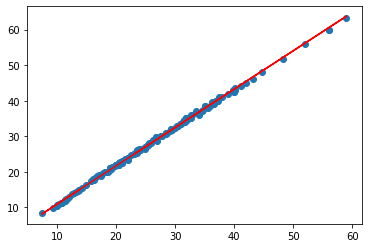

[0.036613523099801246, 1.0800012395486354]
[0.03664565691627176, 1.0800001693366137]
[0.03667778668896247, 1.079999099259249]
[0.03670991241838279, 1.0799980293165405]
[0.03674203410504165, 1.0799969595084749]
[0.036774151749447814, 1.0799958898350355]


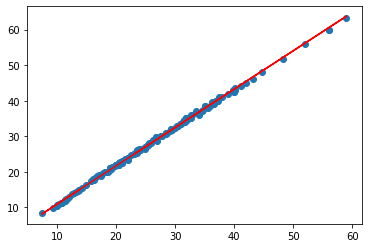

[0.03680626535210998, 1.0799948202962057]
[0.03683837491353677, 1.0799937508919688]
[0.036870480434236734, 1.0799926816223078]
[0.03690258191471837, 1.0799916124872055]
[0.0369346793554901, 1.0799905434866452]
[0.03696677275706029, 1.07998947462061]


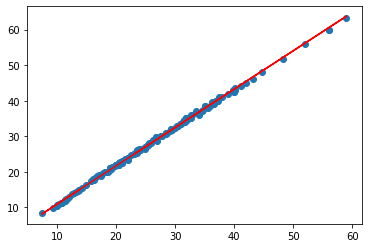

[0.03699886211993724, 1.0799884058890827]
[0.037030947444629196, 1.0799873372920468]
[0.037063028731644326, 1.079986268829485]
[0.03709510598149073, 1.0799852005013804]
[0.03712717919467647, 1.0799841323077164]
[0.037159248371709516, 1.0799830642484758]


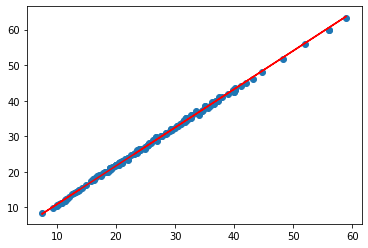

[0.03719131351309778, 1.0799819963236417]
[0.037223374619349124, 1.0799809285331972]
[0.037255431690971334, 1.0799798608771254]
[0.03728748472847214, 1.0799787933554095]
[0.037319533732359196, 1.0799777259680325]
[0.037351578703140105, 1.0799766587149777]


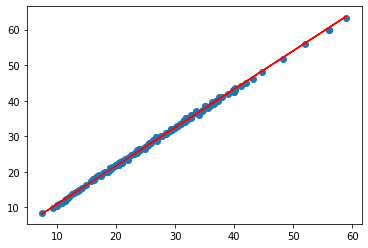

[0.0373836196413224, 1.079975591596228]
[0.037415656547413544, 1.0799745246117662]
[0.03744768942192095, 1.0799734577615758]
[0.03747971826535196, 1.07997239104564]
[0.03751174307821384, 1.0799713244639415]
[0.03754376386101382, 1.0799702580164638]


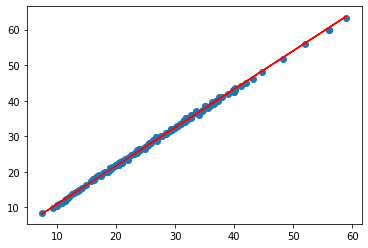

[0.037575780614259036, 1.0799691917031897]
[0.03760779333845659, 1.0799681255241025]
[0.0376398020341135, 1.0799670594791853]
[0.03767180670173672, 1.0799659935684212]
[0.037703807341833144, 1.079964927791793]
[0.03773580395490961, 1.0799638621492844]


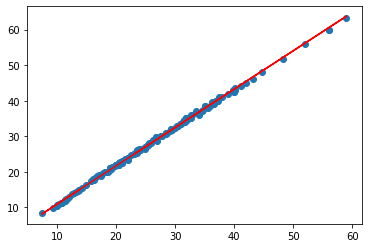

[0.03776779654147288, 1.0799627966408782]
[0.037799785102029665, 1.0799617312665575]
[0.0378317696370866, 1.0799606660263055]
[0.037863750147150266, 1.0799596009201053]
[0.03789572663272717, 1.07995853594794]
[0.03792769909432376, 1.0799574711097928]


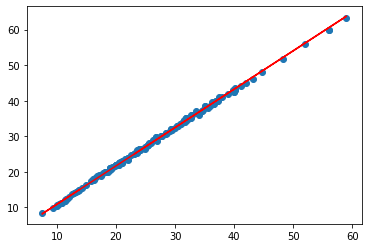

[0.03795966753244643, 1.0799564064056468]
[0.037991631947601495, 1.0799553418354852]
[0.03802359234029521, 1.0799542773992912]
[0.038055548711033775, 1.0799532130970475]
[0.03808750106032332, 1.0799521489287378]
[0.0381194493886699, 1.079951084894345]


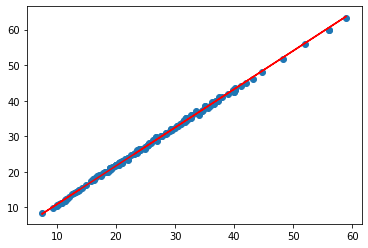

[0.038151393696579536, 1.0799500209938522]
[0.03818333398455816, 1.0799489572272425]
[0.038215270253111645, 1.0799478935944995]
[0.0382472025027458, 1.0799468300956057]
[0.038279130733966375, 1.0799457667305448]
[0.03831105494727906, 1.0799447034992995]


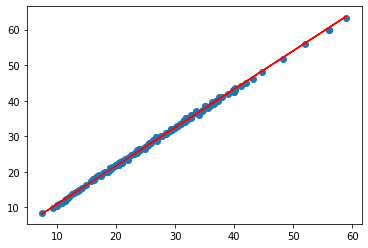

[0.038342975143189476, 1.0799436404018534]
[0.038374891322203175, 1.0799425774381894]
[0.03840680348482565, 1.0799415146082907]
[0.03843871163156234, 1.0799404519121405]
[0.038470615762918596, 1.079939389349722]
[0.038502515879399735, 1.0799383269210183]


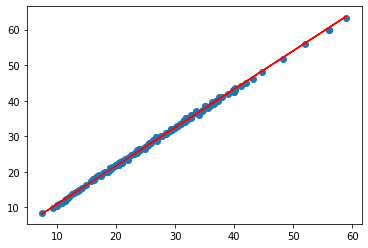

[0.03853441198151099, 1.0799372646260126]
[0.038566304069757536, 1.079936202464688]
[0.038598192144644494, 1.0799351404370277]
[0.03863007620667691, 1.079934078543015]
[0.038661956256359764, 1.079933016782633]
[0.038693832294197976, 1.079931955155865]


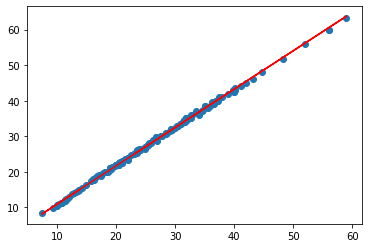

[0.03872570432069641, 1.0799308936626941]
[0.038757572336359854, 1.0799298323031035]
[0.038789436341693045, 1.0799287710770762]
[0.03882129633720065, 1.0799277099845956]
[0.03885315232338726, 1.0799266490256447]
[0.03888500430075744, 1.0799255882002072]


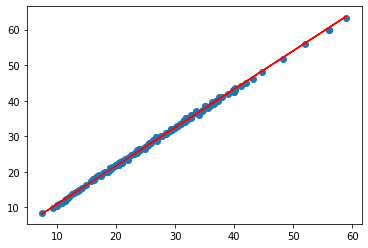

[0.038916852269815644, 1.0799245275082658]
[0.038948696231066296, 1.0799234669498037]
[0.038980536185013744, 1.0799224065248043]
[0.03901237213216228, 1.0799213462332509]
[0.03904420407301611, 1.0799202860751265]
[0.039076032008079416, 1.0799192260504142]


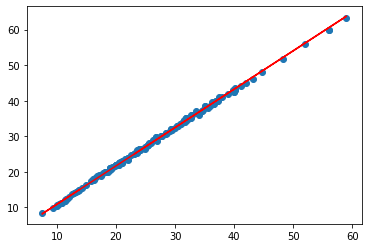

[0.03910785593785628, 1.0799181661590975]
[0.03913967586285074, 1.0799171064011595]
[0.03917149178356676, 1.0799160467765834]


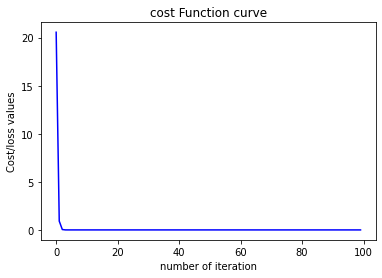

In [20]:
alpha=0.001
iter=100
#training(x_value,y_value,alpha,iter)
theta_array=training(x_value,y_value,alpha,iter)

In [21]:
theta_array

[0.03917149178356676, 1.0799160467765834]

In [22]:
hypothesis(theta_array,46.0)
cost_function(theta_array,x_value,y_value,len(x_value))
#0.05915144488848537 For iters=50 alpha = 0.01
#0.059192692828032925 For iters = 10 alpha = 0.01
#0.05910046555781748  For iters = 100 alpha = 0.01

0.05910046555781748

In [23]:
SSTO = []   # total sum of squares
SSR = []    # regression sum of squares
SSE = []    # error sum of squares
y_mean = np.mean(y_train)

In [24]:


m=x_train.size
for i in range(m):
  prediction = hypothesis(theta_array, x_train[i])  # value of prediction (value of hypothesis at point i)
  y_i = y_train[i]                             # value of 'y' at point i
  SSE.append((prediction - y_i)**2)           # sum of values in the array is SSE (error sum of squares)
  SSR.append((prediction - y_mean)**2)        # sum of values in the array is SSR (regression sum of squares)
  SSTO.append((y_i - y_mean)**2)              # sum of values in the array is SSTO (total sum of squares)



In [25]:
print('\naverage error is : ', sum(SSE)/len(SSE))
print('\nsum of squares of error (SSE) : ', sum(SSE))
print('\nregression sum of squares (SSR) : ', sum(SSR))
print('\ntotal sum of squares (SSTO) : ', sum(SSTO))
print('\nThe Coefficient Of Determination R-squared is : ', (sum(SSR)/sum(SSTO))*100,'%') 


average error is :  0.11820093111563496

sum of squares of error (SSE) :  18.793948047385957

regression sum of squares (SSR) :  18413.303164788922

total sum of squares (SSTO) :  18144.6706918239

The Coefficient Of Determination R-squared is :  101.48050343556838 %


Here Length1 and Length2 of fish is quite smilliar thats why we are getting too much perferct result. it is diagonal and cross length of fish thats why it is quite similiar to each other.